In [1]:
import time


In [2]:
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
# number 1 to 10 data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# 每個 MNIST 中的圖片都有一個對應的 label 也就是從 0 到 9 的數值．
# 在這裡每個 label 都是一個 one-hot vectors
# one-hot vector 是指說只有一個維度是 1 其他都是 0
# 例如 label 0 的表示法就是 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## CNN
convolutional

pooling

fully-connected

In [4]:
#計算準確度
def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
    return result

# v_xs: input
# v_ys: output
# keep_prob是保留概率，即我们要保留的结果所占比例
#          使输入tensor中某些元素變為0，其它没變0的元素變為原来的1/keep_prob大小！

In [5]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)  #截斷常態分佈
    return tf.Variable(initial)

# stddev:標準差

In [6]:
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [7]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

# x:input
# W:weight
# padding: same、valid
# stride [1, x_movement, y_movement, 1]      Must have strides[0] = strides[3] = 1

In [8]:
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

# stride [1, x_movement, y_movement, 1]

## max pooling
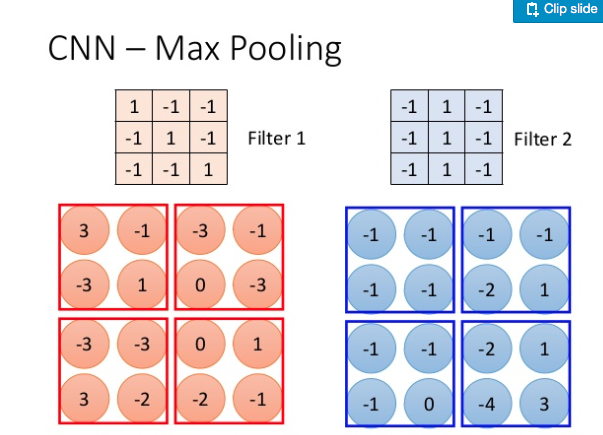

# LeNet 結構
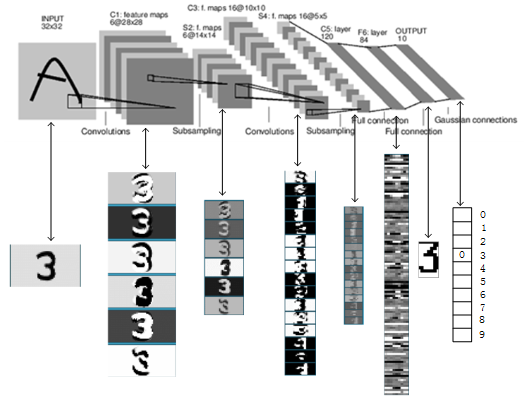

# NN
> label:結果 

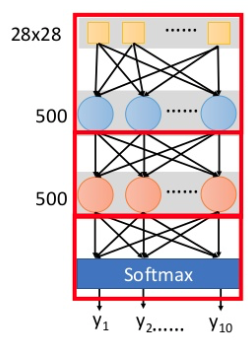

In [4]:
# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 784])/256   # 28x28
print(xs)
ys = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)
x_image = tf.reshape(xs, [-1, 28, 28, 1])    #[n_samples個數,圖長,圖寬,圖高]
print(x_image.shape)  # [n_samples, 28,28,1]


# 假設是50張，大小為56×56，執行 x_image = tf.reshape(x, [-1, 28, 28, 1])
# 計算 a=50×56×56/28/28/1=200
# 得到 x_image為（200，28，28，1）

Tensor("truediv:0", shape=(?, 784), dtype=float32)
(?, 28, 28, 1)


In [13]:
## conv1 layer ##
W_conv1 = weight_variable([5,5,1,6])                     # patch 5x5, input size(image的高度，灰階=1) 1, output size 32
print(W_conv1)
b_conv1 = bias_variable([6]) 
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) # output size 28x28x32     (32-5+1=28)
print(h_conv1)
h_pool1 = max_pool_2x2(h_conv1)                          # output size 14x14x32     (28/2=14)
print(h_pool1)


# relu

<tf.Variable 'Variable_2:0' shape=(5, 5, 1, 6) dtype=float32_ref>
Tensor("Relu_1:0", shape=(?, 28, 28, 6), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 14, 14, 6), dtype=float32)


## relu
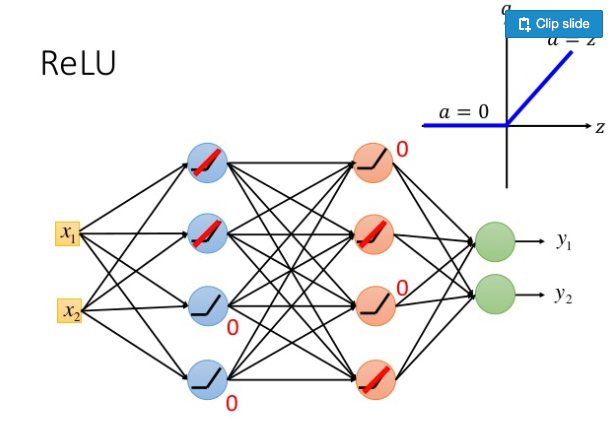
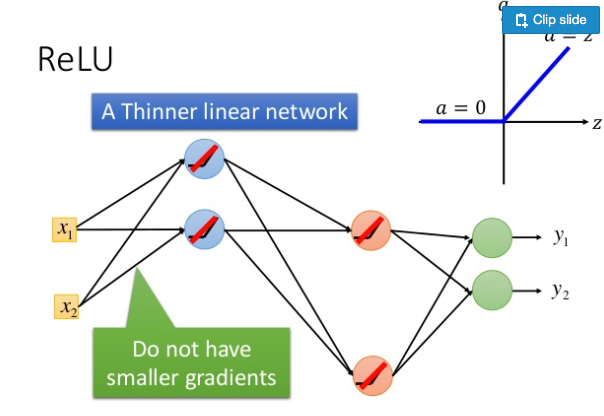

In [14]:
## conv2 layer ##
W_conv2 = weight_variable([5,5,6,16])                           # patch 5x5, in size 32, out size 64
b_conv2 = bias_variable([16])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)        # output size 14x14x16
print(h_conv2)
h_pool2 = max_pool_2x2(h_conv2)                                 # output size 7x7x16
print(h_pool2)

Tensor("Relu_2:0", shape=(?, 14, 14, 16), dtype=float32)
Tensor("MaxPool_2:0", shape=(?, 7, 7, 16), dtype=float32)


In [15]:
## fc1 layer ##
W_fc1 = weight_variable([7*7*16, 1024])
b_fc1 = bias_variable([1024])
                                                               # [n_samples, 7, 7, 64] ->> [n_samples, 7*7*64]
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*16])
print(h_pool2_flat)
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

Tensor("Reshape_3:0", shape=(?, 784), dtype=float32)


## dropout
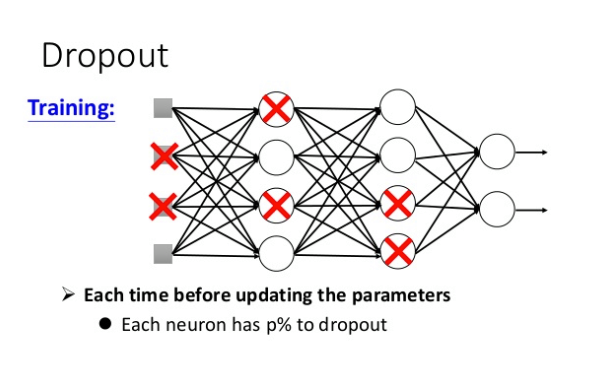

In [16]:
## fc2 layer ##
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
prediction = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)
print(prediction)

# softmax: 
# 輸入向量 [ 1 , 2 , 3 , 4 , 1 , 2 , 3 ] 
# 對應的Softmax函數的值為 [ 0.024 , 0.064 , 0.175 , 0.475 , 0.024 , 0.064 , 0.175 ] 
# 輸出向量中擁有最大權重的項對應著輸入向量中的最大值「4」。
# 這也顯示了這個函數通常的意義：對向量進行歸一化，凸顯其中最大的值並抑制遠低於最大值的其他分量。

Tensor("Softmax:0", shape=(?, 10), dtype=float32)


In [17]:
# the error between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))       # loss
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
print(train_step)
sess = tf.Session()

init = tf.global_variables_initializer()     # before 2017-03 use : init = tf.initialize_all_variables()
sess.run(init)

name: "Adam"
op: "NoOp"
input: "^Adam/update_Variable_2/ApplyAdam"
input: "^Adam/update_Variable_3/ApplyAdam"
input: "^Adam/update_Variable_4/ApplyAdam"
input: "^Adam/update_Variable_5/ApplyAdam"
input: "^Adam/update_Variable_6/ApplyAdam"
input: "^Adam/update_Variable_7/ApplyAdam"
input: "^Adam/update_Variable_8/ApplyAdam"
input: "^Adam/update_Variable_9/ApplyAdam"
input: "^Adam/Assign"
input: "^Adam/Assign_1"



In [18]:
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
    
    if i % 50 == 0:
        print('train',i,'  ',compute_accuracy(mnist.test.images[:1000], mnist.test.labels[:1000]))
        

train 0    0.033
train 50    0.604
train 100    0.754
train 150    0.818
train 200    0.848
train 250    0.875
train 300    0.891
train 350    0.903
train 400    0.902
train 450    0.914
train 500    0.915
train 550    0.922
train 600    0.927
train 650    0.922
train 700    0.936
train 750    0.932
train 800    0.937
train 850    0.941
train 900    0.946
train 950    0.948


In [ ]:
# start = time.time()
# sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
# end = time.time()
# print("Time taken: ", end - start, "seconds.")